# **Exploratory Analysis of Car dealer and CO2 Emission in United States**

### **Project Milestone 1**
Group Member Name: Li Zechen

[Link to Github.io website](https://zcli48.github.io/)

## **Project Plan**
Carbon dioxide enters our atmosphere from both human and natural activity, though human activity has been responsible for the majority of greenhouse gas emissions in the past 150 years. The biggest culprit is burning fossil fuels like oil, coal, and natural gas for transportation and heat.

The goal of this project is to analyze the relationships among the workforce and average wage of car dealers and the CO2 emissions in different states in United States. The project aims to gain insights into how these factors interact with each other and try to get deeper understanding. By examining these relationships, we seek to answer questions such as:

1. What is the relationship between the average wage of car dealers and the workforce of car dealers in the state?

2. Can we identify any trends or patterns that suggest the impact of car dealerships on CO2 emissions or vice versa?

For now these datasets lack some depth and breadth, in the process of the project I will merge in more datasets to make the analysis more insightful and reliable. Also, more factors will be taken into account, other data will be needed.

Resources: 
1. U.S. states ranked by carbon dioxide emissions: https://solarpower.guide/solar-energy-insights/states-ranked-carbon-dioxide-emissions
2. Average wage and workforce of Car dealers in  U.S. states: https://datausa.io/profile/naics/car-dealers?workforceByStates=wage

## **Collaboration Plan**

As a graduate student, I will work on this project individually.

## **ETL (Extraction, Transform, and Load)**

First, identify the sources of datasets, scrape and download the datasets, exploring the raw data to understand its structure. Use Pandas convert them to dataframe, loaded them. Then tidied them by reset index, fix missing values, change column names, delete unneeded rows and columns and so on.

In [38]:
!pip3 install lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import lxml
import matplotlib.pyplot as plt
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

**Table1**

The first table is from SolarPower.Guide.

Carbon dioxide emissions are among the primary contributing factors of climate change. In order to slow the negative effects of climate change, it's generally recognized that everyone around the world must do their part to reduce emissions. Many areas have already committed to a plan to reduce their emissions in the next few years. But how is the United States faring? In the dataset In the dataset named U.S. STATES RANKED BY CARBON DIOXIDE EMISSIONS, the team at Solar Power Guide looked at CO2 emissions by state to see which U.S. states produce the most and least emissions per capita.The table contain state, annual CO2 emissions, population, annual CO2 emissions per capita and rank of annual CO2 emissions per capita.

The dataset may provide insight to questions like:

1. Which are the states with high CO2 emission and low CO2 emission?
2. Is there any common ground between them?

[Link of table1](https://solarpower.guide/solar-energy-insights/states-ranked-carbon-dioxide-emissions)

Scrape the data, convert to dataframe. Uniform the CO2 Emissions by round it to 1 decimal place. check for missing values.

In [39]:
url = "https://solarpower.guide/solar-energy-insights/states-ranked-carbon-dioxide-emissions"

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)# use headers

page_content = response.text
soup = BeautifulSoup(page_content, "html.parser")
table = soup.find('table')
CO2_emission = pd.read_html(str(table), header=0)[0]
CO2_emission['Annual CO2 Emissions per Capita (Metric Tons)'] = CO2_emission['Annual CO2 Emissions per Capita (Metric Tons)'].round(1)

dimensions = CO2_emission.shape
print(f"Dimension: {dimensions[0]} × {dimensions[1]}")# print dimension

missing_values1 = CO2_emission.isna().sum()
print(missing_values1) # check for missing value

# display the DataFrame
display(CO2_emission)
CO2_emission.dtypes

Dimension: 50 × 5
Rank                                              0
State                                             0
Annual CO2 Emissions (Millions of Metric Tons)    0
Population                                        0
Annual CO2 Emissions per Capita (Metric Tons)     0
dtype: int64


,Rank,State,Annual CO2 Emissions (Millions of Metric Tons),Population,Annual CO2 Emissions per Capita (Metric Tons)
0,1,Wyoming,60.6,579994,104.5
1,2,North Dakota,56.2,756755,74.3
2,3,West Virginia,90.8,1818683,49.9
3,4,Louisiana,226.4,4673673,48.4
4,5,Alaska,34.1,740983,46.0
5,6,Montana,30.3,1053862,28.8
6,7,Indiana,175.8,6662068,26.4
7,8,Kentucky,113.6,4455590,25.5
8,9,Texas,706.5,28291024,25.0
9,10,Nebraska,47.7,1916998,24.9


Rank                                                int64
State                                              object
Annual CO2 Emissions (Millions of Metric Tons)    float64
Population                                          int64
Annual CO2 Emissions per Capita (Metric Tons)     float64
dtype: object

**Table2 and Table3**

Table2 and Table3 are from the Data USA. Data USA is set of curated data, mostly reposts of other things findable from other places but in easier to use formats.  The 2 datasets provides information about the wage and workforce in the car dealership industry for various states in the year 2020. They includes data on workforce status and unique identifiers for states, years, and industry groups, as well as the state names and slug representations.

The dataset may provide insight to questions like:

1.  In which states the car dealership industry is developed?
2.  Is there any relationship between wage and workforce of car dealers?

[Link of table2 and table3](https://datausa.io/profile/naics/car-dealers?workforceByStates=wage)

In [40]:
wage = pd.read_csv(r'wage.csv')
wage.head()

,ID State,State,ID Year,Year,ID Industry Group,Industry Group,ID Workforce Status,Workforce Status,Average Wage,Slug State
0,04000US72,Puerto Rico,2020,2020,4411,Car Dealers,True,True,25262.858482,puerto-rico
1,04000US01,Alabama,2020,2020,4411,Car Dealers,True,True,47640.432508,alabama
2,04000US02,Alaska,2020,2020,4411,Car Dealers,True,True,52611.651941,alaska
3,04000US04,Arizona,2020,2020,4411,Car Dealers,True,True,59807.053203,arizona
4,04000US05,Arkansas,2020,2020,4411,Car Dealers,True,True,56431.590377,arkansas


In [41]:
workforce = pd.read_csv(r'workforce.csv')
workforce.head()

,ID State,State,ID Year,Year,ID Industry Group,Industry Group,ID Workforce Status,Workforce Status,Total Population,Slug State
0,04000US72,Puerto Rico,2020,2020,4411,Car Dealers,True,True,6720,puerto-rico
1,04000US01,Alabama,2020,2020,4411,Car Dealers,True,True,19343,alabama
2,04000US02,Alaska,2020,2020,4411,Car Dealers,True,True,2241,alaska
3,04000US04,Arizona,2020,2020,4411,Car Dealers,True,True,29923,arizona
4,04000US05,Arkansas,2020,2020,4411,Car Dealers,True,True,11098,arkansas


First, merge the 2 table, drop the features we do not need, then uniform the wage by round it to 1 decimal place. Rename columns, generate a new feature 'Total Wage' which is average wage*population, then check for missing values.

In [42]:
dealer = pd.merge(wage, workforce)

columns_to_drop = [
    'ID State',
    'ID Year',
    'ID Industry Group',
    'Industry Group',
    'ID Workforce Status',
    'Workforce Status',
    'Slug State'
]

# drop the columns
dealer.drop(columns=columns_to_drop, inplace=True)

dealer['Average Wage'] = dealer['Average Wage'].round(1)# round to 1 demical place
dealer = dealer[dealer['Year'] == 2020]# keep the newest data

dealer.rename(columns={'Average Wage': 'Average Wage(USD)'}, inplace=True)
dealer['Total Wage(M USD)'] = (dealer['Average Wage(USD)'] * dealer['Total Population']) / 1000000 #generate new feature
dealer['Total Wage(M USD)'] = dealer['Total Wage(M USD)'].round(1)

missing_values = dealer.isna().sum()
print(missing_values) # check for missing value
dealer.head()


State                0
Year                 0
Average Wage(USD)    0
Total Population     0
Total Wage(M USD)    0
dtype: int64


,State,Year,Average Wage(USD),Total Population,Total Wage(M USD)
0,Puerto Rico,2020,25262.9,6720,169.8
1,Alabama,2020,47640.4,19343,921.5
2,Alaska,2020,52611.7,2241,117.9
3,Arizona,2020,59807.1,29923,1789.6
4,Arkansas,2020,56431.6,11098,626.3


Find different rows in 2 tables, there are extra rows 'Puerto Rico' and 'District of Columbia' which are not state in table dealer, remove them.

In [43]:
# find unique state
unique_CO2_emission = CO2_emission[~CO2_emission['State'].isin(dealer['State'])]['State']
unique_dealer = dealer[~dealer['State'].isin(CO2_emission['State'])]['State']

CO2_emission = CO2_emission[CO2_emission['State'].isin(dealer['State'])] # remove difference
dealer = dealer[dealer['State'].isin(CO2_emission['State'])]
dealer.reset_index(drop=True, inplace=True)
dimensions1 = dealer.shape
print(f"Dimension: {dimensions1[0]} × {dimensions1[1]}")
display(dealer)
dealer.dtypes

# print unique states
#print(unique_CO2_emission.tolist())
#print(unique_dealer.tolist())

Dimension: 50 × 5


,State,Year,Average Wage(USD),Total Population,Total Wage(M USD)
0,Alabama,2020,47640.4,19343,921.5
1,Alaska,2020,52611.7,2241,117.9
2,Arizona,2020,59807.1,29923,1789.6
3,Arkansas,2020,56431.6,11098,626.3
4,California,2020,60617.6,126539,7670.5
5,Colorado,2020,57648.8,20966,1208.7
6,Connecticut,2020,58205.8,14914,868.1
7,Delaware,2020,47865.9,5311,254.2
8,Florida,2020,54050.1,94414,5103.1
9,Georgia,2020,60663.3,40438,2453.1


State                 object
Year                   int64
Average Wage(USD)    float64
Total Population       int64
Total Wage(M USD)    float64
dtype: object

## **EDA (Exploratory Data Analysis)**

Find average Total Population in table dealer, we can use it to judge whether a state's car dealership is developed.

In [44]:
average_population = dealer["Total Population"].mean().astype(int)
print("Average Total Population:", average_population)

Average Total Population: 25144


Find 10 states with the highest Annual CO2 Emissions for analysis what can cause high CO2 Emission.

In [45]:
sorted_CO2_emission = CO2_emission.sort_values(by="Annual CO2 Emissions (Millions of Metric Tons)", ascending=False)
top_10_states = sorted_CO2_emission.head(10)
display(top_10_states)

,Rank,State,Annual CO2 Emissions (Millions of Metric Tons),Population,Annual CO2 Emissions per Capita (Metric Tons)
8,9,Texas,706.5,28291024,25.0
47,48,California,358.6,39337785,9.1
38,39,Florida,226.6,20977089,10.8
3,4,Louisiana,226.4,4673673,48.4
21,22,Pennsylvania,215.3,12794679,16.8
19,20,Ohio,204.3,11665706,17.5
24,25,Illinois,201.1,12779893,15.7
6,7,Indiana,175.8,6662068,26.4
49,50,New York,156.7,19593849,8.0
26,27,Michigan,151.8,9976752,15.2


Find 10 states with the highest average wage.

In [46]:
sorted_dealer = dealer.sort_values(by="Average Wage(USD)", ascending=False)
top_10_wage_states = sorted_dealer.head(10)
display(top_10_wage_states)

,State,Year,Average Wage(USD),Total Population,Total Wage(M USD)
29,New Jersey,2020,63653.9,34778,2213.8
36,Oregon,2020,63102.3,12880,812.8
46,Washington,2020,60940.6,23919,1457.6
44,Vermont,2020,60728.2,3594,218.3
9,Georgia,2020,60663.3,40438,2453.1
4,California,2020,60617.6,126539,7670.5
26,Nebraska,2020,60467.3,8421,509.2
10,Hawaii,2020,59807.6,4733,283.1
2,Arizona,2020,59807.1,29923,1789.6
19,Maryland,2020,59806.0,23076,1380.1


The scatter plot of Average Wage and Total Population can show us if there is a relationship between wage and workforce. We can see there may exist a linear relationship and some outliers.

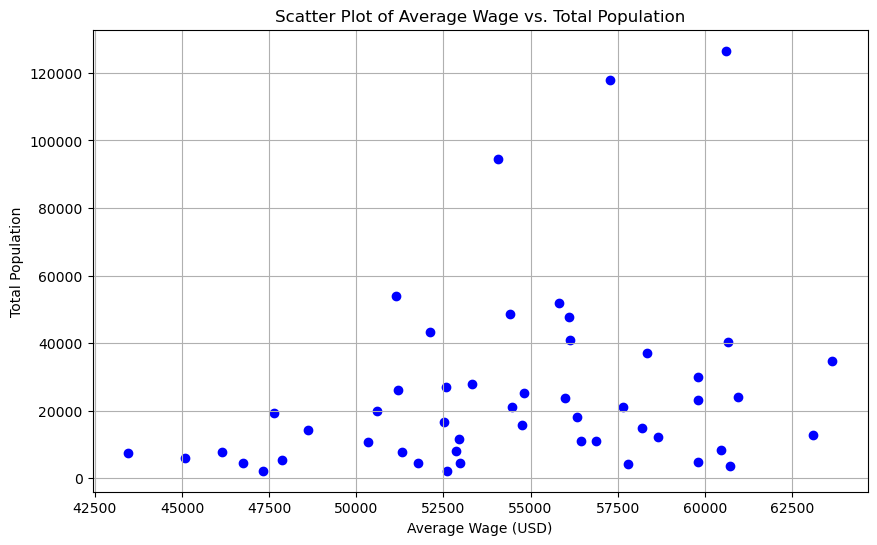

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(dealer['Average Wage(USD)'], dealer['Total Population'], c='blue')
plt.title('Scatter Plot of Average Wage vs. Total Population')
plt.xlabel('Average Wage (USD)')
plt.ylabel('Total Population')
plt.grid(True)

plt.show()

Through the bar plot we can see the data of Annual CO2 Emissions per Capita is right-skewed.

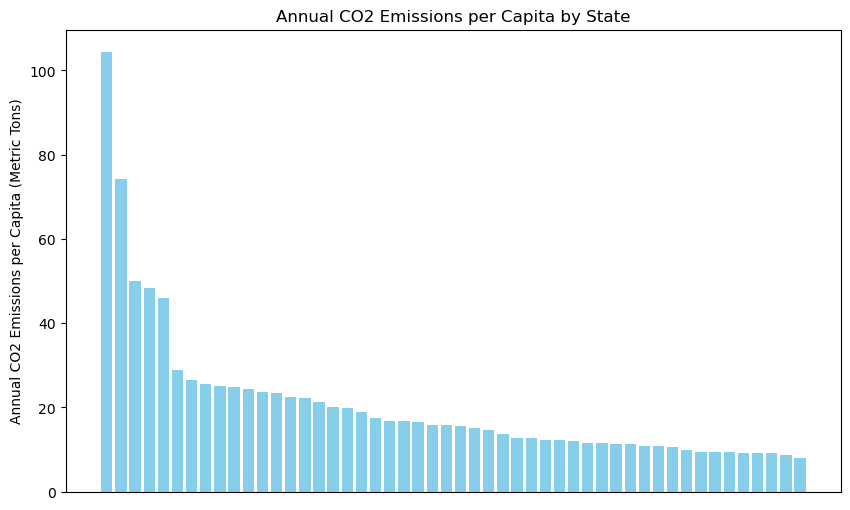

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(CO2_emission["State"], CO2_emission["Annual CO2 Emissions per Capita (Metric Tons)"], color='skyblue')

plt.xticks([])
plt.ylabel("Annual CO2 Emissions per Capita (Metric Tons)")
plt.title("Annual CO2 Emissions per Capita by State")
plt.show()